# EDA, Correlation, Bivariate Regression and Hypothesis Testing on Bike Rental data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
df_day=pd.read_csv('day.csv',parse_dates=['dteday'])
df_day.set_index('instant',inplace=True)

In [3]:
# Load the dataset
df_hour=pd.read_csv('hour.csv',parse_dates=['dteday'])
df_hour.set_index('instant',inplace=True)

In [4]:
df_day.shape

(731, 15)

In [5]:
#".head()" method will show the first 5 rows of the dataframe
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#".head()" method will show the first 5 rows of the dataframe
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
df_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
df_hour.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


No null values

# Basic Data Exploration

In [9]:
df_day.dteday.dtype

dtype('<M8[ns]')

In [10]:
#The ".shape" attribute returns the overall shape of the data as a tuple with 2 elements. The first element denotes the number of rows of observations and the second element denotes the number of columns in the dataset.
df_day.shape

(731, 15)

In [11]:
#The ".shape" attribute returns the overall shape of the data as a tuple with 2 elements. The first element denotes the number of rows of observations and the second element denotes the number of columns in the dataset.
df_hour.shape

(17379, 16)

In [12]:
#statistical summary
df_day[['temp','atemp','hum','windspeed','casual','registered','cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
#statistical summary
df_hour[['temp','atemp','hum','windspeed','casual','registered','cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Exploring the data using Visualizations 

{'whiskers': [<matplotlib.lines.Line2D at 0x28d18477640>,
 'caps': [<matplotlib.lines.Line2D at 0x28d18477d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d184772e0>],
 'medians': [<matplotlib.lines.Line2D at 0x28d18486400>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d18486760>],
 'means': []}

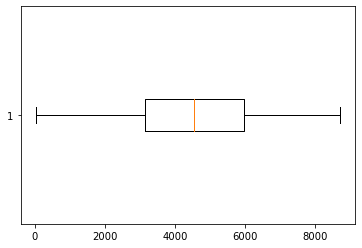

In [14]:
plt.boxplot(df_day.cnt,vert=False)

<AxesSubplot:xlabel='season', ylabel='cnt'>

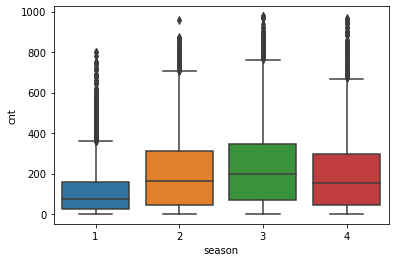

In [15]:
sns.boxplot(x='season',y='cnt',data=df_hour)

In [16]:
df_hour.groupby('season')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,4242.0,111.114569,119.224010,1.0,23.0,76.0,158.0,801.0
2,4409.0,208.344069,188.362473,1.0,46.0,165.0,311.0,957.0
3,4496.0,236.016237,197.711630,1.0,68.0,199.0,345.0,977.0
4,4232.0,198.868856,182.967972,1.0,46.0,155.5,295.0,967.0


(array([ 117.,  953., 2444., 2913., 2433., 2684., 3150., 1976.,  625.,
          84.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <BarContainer object of 10 artists>)

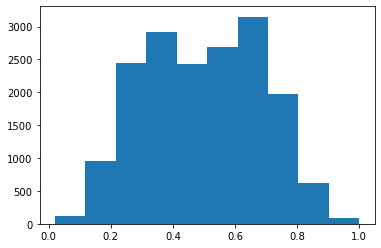

In [17]:
plt.hist(df_hour['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28d18ee8670>,
 'caps': [<matplotlib.lines.Line2D at 0x28d18ee8d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x28d18ee8310>],
 'medians': [<matplotlib.lines.Line2D at 0x28d18ef2430>],
 'fliers': [<matplotlib.lines.Line2D at 0x28d18ef2790>],
 'means': []}

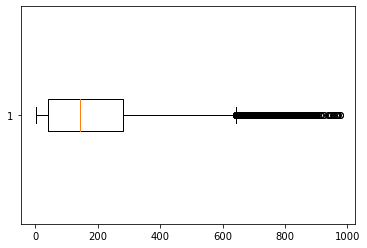

In [18]:
plt.boxplot(df_hour.cnt,vert=False)

In the hourly data, there are many outliers in the 'cnt' variable distribution, hence, we will consider the median in this case for our further analysis.

(array([  7.,  36.,  90., 104.,  93.,  80.,  93., 101., 103.,  24.]),
 array([0.0591304 , 0.13938406, 0.21963772, 0.29989138, 0.38014504,
        0.4603987 , 0.54065236, 0.62090602, 0.70115968, 0.78141334,
        0.861667  ]),
 <BarContainer object of 10 artists>)

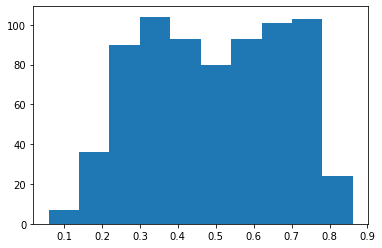

In [19]:
plt.hist(df_day['temp'])

There are no missing values in the columns. All columns are not numeric and some are categorical.

In [20]:
df_day.groupby('yr')['cnt'].mean()

yr
0    3405.761644
1    5599.934426
Name: cnt, dtype: float64

In [21]:
#plt.plot(df_day.dteday,df_day.cnt)

In [22]:
#plt.plot(df_hour.dteday,df_hour.cnt)

In [23]:
df_day['season_name']=df_day['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
df_hour['season_name']=df_hour['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])

In [24]:
df_hour.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [25]:
df_hour.season_name.value_counts()

Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: season_name, dtype: int64

In [26]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dteday       731 non-null    datetime64[ns]
 1   season       731 non-null    int64         
 2   yr           731 non-null    int64         
 3   mnth         731 non-null    int64         
 4   holiday      731 non-null    int64         
 5   weekday      731 non-null    int64         
 6   workingday   731 non-null    int64         
 7   weathersit   731 non-null    int64         
 8   temp         731 non-null    float64       
 9   atemp        731 non-null    float64       
 10  hum          731 non-null    float64       
 11  windspeed    731 non-null    float64       
 12  casual       731 non-null    int64         
 13  registered   731 non-null    int64         
 14  cnt          731 non-null    int64         
 15  season_name  731 non-null    object        
dtypes: datet

In [27]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dteday       17379 non-null  datetime64[ns]
 1   season       17379 non-null  int64         
 2   yr           17379 non-null  int64         
 3   mnth         17379 non-null  int64         
 4   hr           17379 non-null  int64         
 5   holiday      17379 non-null  int64         
 6   weekday      17379 non-null  int64         
 7   workingday   17379 non-null  int64         
 8   weathersit   17379 non-null  int64         
 9   temp         17379 non-null  float64       
 10  atemp        17379 non-null  float64       
 11  hum          17379 non-null  float64       
 12  windspeed    17379 non-null  float64       
 13  casual       17379 non-null  int64         
 14  registered   17379 non-null  int64         
 15  cnt          17379 non-null  int64         
 16  seas

In [28]:
df_day['season_name'].value_counts()

Fall      188
Summer    184
Spring    181
Winter    178
Name: season_name, dtype: int64

<AxesSubplot:xlabel='yr', ylabel='cnt'>

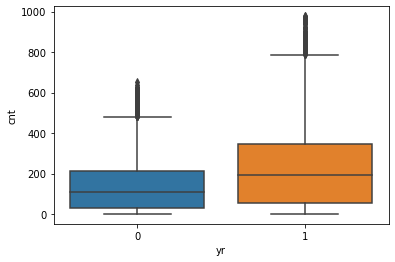

In [29]:
sns.boxplot(x=df_hour.yr,y=df_hour.cnt)

<BarContainer object of 4 artists>

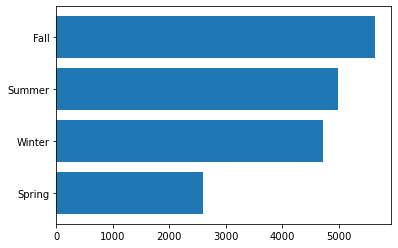

In [30]:
s1=df_day.groupby('season_name')['cnt'].mean().sort_values()
plt.barh(s1.index,s1)

<BarContainer object of 4 artists>

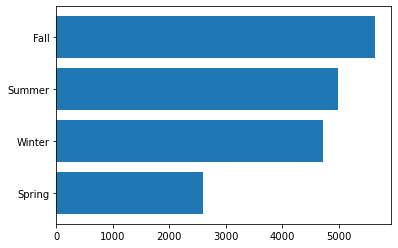

In [31]:
s2=df_hour.groupby('season_name')['cnt'].median().sort_values()
plt.barh(s2.index,s1)

In [32]:
df_hour.groupby('season_name')['cnt'].mean().sort_values()

season_name
Spring    111.114569
Winter    198.868856
Summer    208.344069
Fall      236.016237
Name: cnt, dtype: float64

<AxesSubplot:xlabel='mnth'>

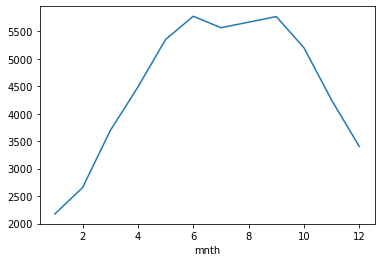

In [33]:
df_day.groupby('mnth')['cnt'].mean().plot()

<AxesSubplot:xlabel='mnth'>

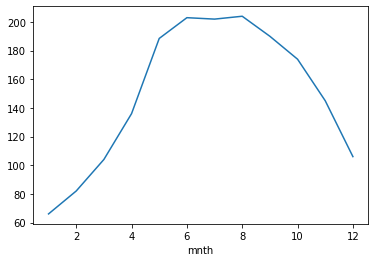

In [34]:
df_hour.groupby('mnth')['cnt'].median().plot()

# Heatmaps

<AxesSubplot:>

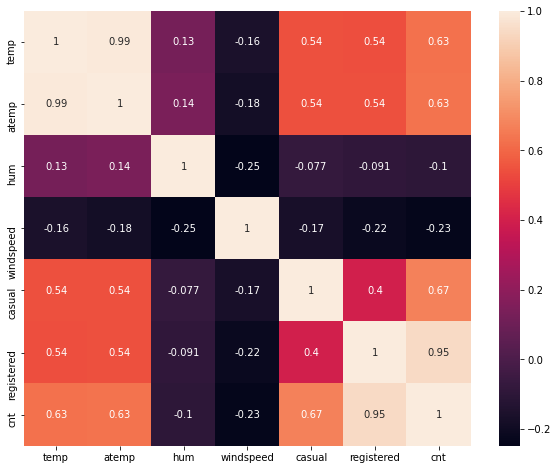

In [35]:
plt.subplots(figsize=(10,8))
sns.heatmap(df_day[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(),annot=True)

1. temp and atemp are very highly correlated (significant p value) and hence one of them should be dropped to prevent the multicollinearity. We will drop atemo which is the feel temperature and keep temp in our dataset.
Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when we fit the model and interpret the results.
when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another.


2. temp and cnt have high correlation )(significant p value) and since here, our objective is to predict the count of bike rents, temp can be considered as an important predictor variable.

3. Humidity is very weakly correlated with the other variables and hence, we can keep it. It is also weakly negatively correlated with cnt. It might not be a very good predictor in bivariate regression to predict cnt.

4. Similarly windspeed is weakly associated with cnt and may not be that good a predictor but still slightly better than humidity.Also, humidity and windspeed has some weak negative association between them but still since the correlation is weak, we will not drop any.

5. Registered and casual bike rents are added to get the cnt column and they are showing more or less similar behavior with the other features and are highly correlated with cnt. Hence, we will drop casual and registered and work with only cnt.


We perform a hypothesis test of the “significance of the correlation coefficient” to decide whether the linear relationship in the sample data is strong enough to use to model the relationship in the population.

If p value<0.05 -> There is a significant linear relationship between x and y.

In [36]:
r,p=stats.pearsonr(df_day['temp'],df_day['cnt'])
print(r,p)

0.627494009033492 2.8106223975907754e-81


In [37]:
r,p=stats.pearsonr(df_day['hum'],df_day['cnt'])
print(r,p)


-0.10065856213715525 0.006454143325438633


In [38]:
r,p=stats.pearsonr(df_day['windspeed'],df_day['cnt'])
print(r,p)

-0.23454499742167 1.3599586778869642e-10


In [39]:
r,p=stats.pearsonr(df_day['temp'],df_day['atemp'])
print(r,p)

0.9917015532294637 0.0


In [40]:
r,p=stats.pearsonr(df_day['hum'],df_day['windspeed'])
print(r,p)

-0.24848909864371405 9.487955991301833e-12


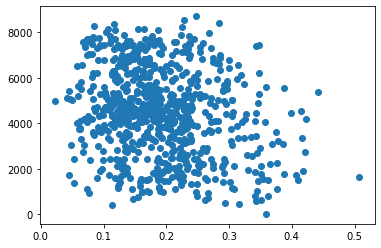

In [41]:
plt.scatter(df_day.windspeed,df_day.cnt)

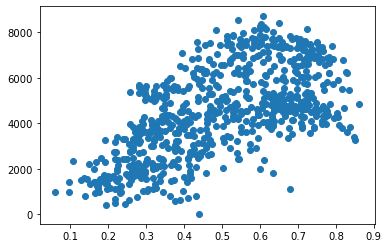

In [42]:
plt.scatter(df_day.temp,df_day.cnt) #Similarly feel temp (atemp) and number of bikes hired have positive association2

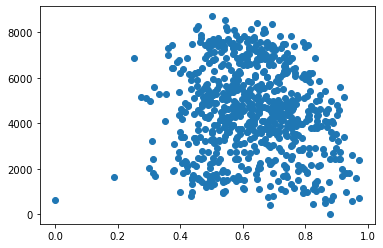

In [43]:
plt.scatter(df_day.hum,df_day.cnt)

<AxesSubplot:>

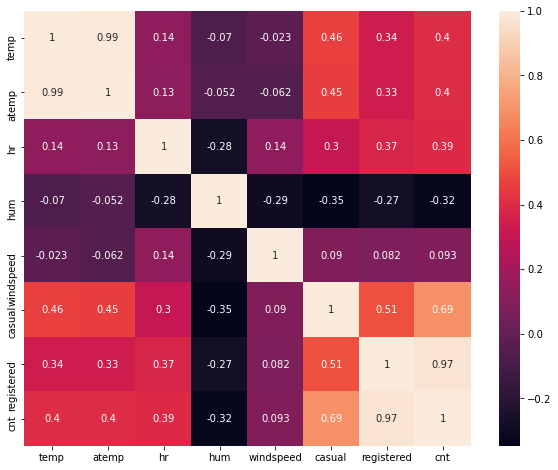

In [44]:
plt.subplots(figsize=(10,8))
sns.heatmap(df_hour[['temp','atemp','hr','hum','windspeed','casual','registered','cnt']].corr(),annot=True)

1. Moderate Positive association between hour and count.

2. Weak negative association between humidity and count.

3. Very very weak positive association between windspeed and count (contradiction from daily data where we got weak negative association). 

However, since hourly data records the hourly count of bike rent, that might be able to give a more detailed picture about the bike renting behaviour since temperature, windspeed, humidity can fluctuate and hourly data might be able to capture that better than daily data which gives an aggregate value.

We will thus consider the hourly data.



In [45]:
r,p=stats.pearsonr(df_hour['temp'],df_hour['cnt'])
print(r,p)

0.4047722757786586 0.0


In [46]:
r,p=stats.pearsonr(df_hour['hum'],df_hour['cnt'])
print(r,p)

-0.3229107408245602 0.0


In [47]:
r,p=stats.pearsonr(df_hour['windspeed'],df_hour['cnt'])
print(r,p)

0.09323378392612534 7.345742373499617e-35


In [48]:
r,p=stats.pearsonr(df_hour['hr'],df_hour['cnt'])
print(r,p)

0.3940714977829432 0.0


In [49]:
r,p=stats.pearsonr(df_hour['hum'],df_hour['windspeed'])
print(r,p)

-0.2901048950638614 0.0


<AxesSubplot:xlabel='hr'>

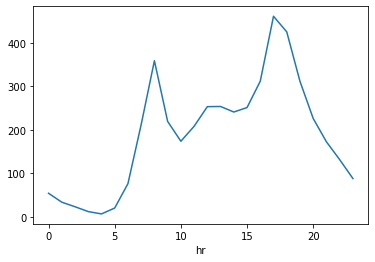

In [50]:
df_hour.groupby('hr')['cnt'].mean().plot()

In [51]:
df_day.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [52]:
df_day['WC'] = df_day['weathersit'].replace([1,2,3,4],['Clear','Mist','Light Snow','Heavy Rain'])
df_hour['WC'] = df_hour['weathersit'].replace([1,2,3,4],['Clear','Mist','Light Snow','Heavy Rain'])

In [53]:
df_day.groupby('WC')['cnt'].mean().sort_values(ascending=False)

WC
Clear         4876.786177
Mist          4035.862348
Light Snow    1803.285714
Name: cnt, dtype: float64

In [54]:
df_hour.groupby('WC')['cnt'].median().sort_values(ascending=False)

WC
Clear         159
Mist          133
Light Snow     63
Heavy Rain     36
Name: cnt, dtype: int64

# Feature Engineering

In [55]:
def dayofweek(day):
    if day==0:
        return "Sunday"
    elif day==1:
        return "Monday"
    elif day==2:
        return "Tuesday"
    elif day==3:
        return "Wednesday"
    elif day==4:
        return "Thursday"
    elif day==5:
        return "Friday"
    elif day==6:
        return "Saturday"

In [56]:
def day_type(df):
    df['day_type']=0
    for i in range(df.shape[0]):
        if (df.holiday.iloc[i]==0) &(df.workingday.iloc[i]==0):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Weekend-'+day
        elif (df.holiday.iloc[i]==1) &(df.workingday.iloc[i]==0):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Holiday-'+day
        elif (df.holiday.iloc[i]==0) &(df.workingday.iloc[i]==1):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Work-'+day 
    return df

In [57]:
df_day=day_type(df_day)

C:\Users\Shramana\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
df_hour=day_type(df_hour)

In [59]:
df_day.drop(['season','weathersit','weekday','casual','registered'],axis=1,inplace=True)
df_day.head(2)

,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,WC,day_type
instant,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,0.344167,0.363625,0.805833,0.160446,985,Spring,Mist,Weekend-Saturday
2,2011-01-02,0,1,0,0,0.363478,0.353739,0.696087,0.248539,801,Spring,Mist,Weekend-Sunday


In [60]:
df_hour.drop(['season','weathersit','weekday','casual','registered'],axis=1,inplace=True)
df_hour.head(2)

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,WC,day_type
instant,,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,0,0.24,0.2879,0.81,0.0,16,Spring,Clear,Weekend-Saturday
2,2011-01-01,0,1,1,0,0,0.22,0.2727,0.80,0.0,40,Spring,Clear,Weekend-Saturday


In [61]:
df_hour.groupby('day_type')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
Holiday-Friday,48.0,135.291667,95.655846,3.0,46.75,129.0,208.25,331.0
Holiday-Monday,357.0,166.960784,162.468091,1.0,31.00,100.0,281.00,712.0
Holiday-Thursday,48.0,81.666667,77.569278,2.0,22.75,46.0,124.75,269.0
Holiday-Tuesday,23.0,44.043478,41.126720,1.0,12.00,32.0,68.00,126.0
Holiday-Wednesday,24.0,308.458333,202.209100,16.0,115.50,401.5,487.25,584.0
Weekend-Saturday,2512.0,190.209793,179.820569,1.0,42.00,129.0,300.00,783.0
Weekend-Sunday,2502.0,177.468825,168.167710,1.0,40.00,116.0,288.00,776.0
Work-Friday,2439.0,197.333333,175.067581,1.0,48.00,165.0,289.50,957.0
Work-Monday,2122.0,186.568332,182.108719,1.0,37.00,142.5,266.75,968.0


<BarContainer object of 12 artists>

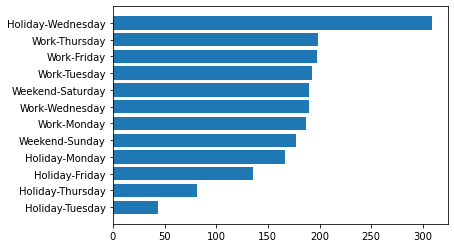

In [62]:
m=df_hour.groupby('day_type')['cnt'].mean().sort_values()
plt.barh(m.index,m)

In [63]:
df_day[df_day['day_type']=='Holiday-Wednesday']

,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,WC,day_type
instant,,,,,,,,,,,,,
551,2012-07-04,1,7,1,0,0.789167,0.732337,0.53875,0.13495,7403,Fall,Clear,Holiday-Wednesday


<BarContainer object of 12 artists>

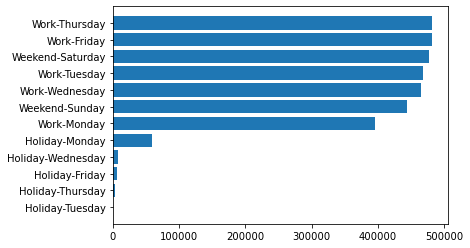

In [64]:
m=df_hour.groupby('day_type')['cnt'].sum().sort_values()
plt.barh(m.index,m)

In [65]:
df_day[['day', 'type']] = df_day['day_type'].str.split('-', 2, expand=True)

In [66]:
df_hour[['day', 'type']] = df_hour['day_type'].str.split('-', 2, expand=True)

In [67]:
df_hour.head()

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,WC,day_type,day,type
instant,,,,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,0,0.24,0.2879,0.81,0.0,16,Spring,Clear,Weekend-Saturday,Weekend,Saturday
2,2011-01-01,0,1,1,0,0,0.22,0.2727,0.80,0.0,40,Spring,Clear,Weekend-Saturday,Weekend,Saturday
3,2011-01-01,0,1,2,0,0,0.22,0.2727,0.80,0.0,32,Spring,Clear,Weekend-Saturday,Weekend,Saturday
4,2011-01-01,0,1,3,0,0,0.24,0.2879,0.75,0.0,13,Spring,Clear,Weekend-Saturday,Weekend,Saturday
5,2011-01-01,0,1,4,0,0,0.24,0.2879,0.75,0.0,1,Spring,Clear,Weekend-Saturday,Weekend,Saturday


# Bar Plot

<BarContainer object of 3 artists>

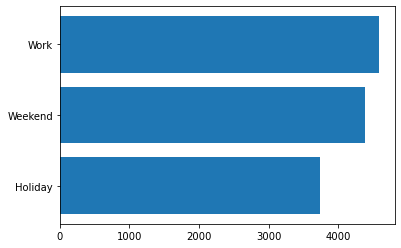

In [68]:
d=df_day.groupby('day')['cnt'].mean().sort_values()
plt.barh(d.index,d)

<BarContainer object of 3 artists>

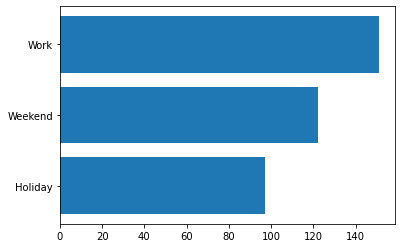

In [69]:
h=df_hour.groupby('day')['cnt'].median().sort_values()
plt.barh(h.index,h)

<BarContainer object of 7 artists>

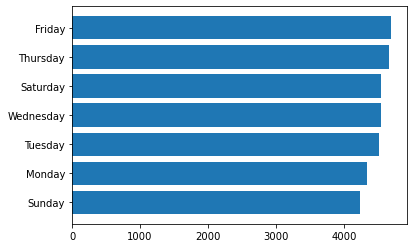

In [70]:
d1=df_day.groupby('type')['cnt'].mean().sort_values()
plt.barh(d1.index,d1)

<BarContainer object of 7 artists>

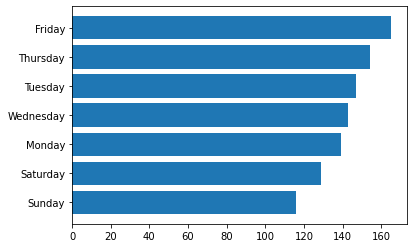

In [71]:
d1=df_hour.groupby('type')['cnt'].median().sort_values()
plt.barh(d1.index,d1)

Day data:-
1. Season wise- Fall season has got the highest mean count of bike hiring and its minimum in Spring.
2. Monthwise- June to October is high
3. Year wise - 2012 has got higher mean hiring
4. Work day mean hiring max, lowest during holidays
5. Friday - max hiring
6. Clear sky -max mean hiring, light snow -min


Hourly data:-

1. Season wise - Fall season has got the highest median 
2. Monthwise- June to October
3. Clear - max median hiring, heavy rain -min
4. Friday - median max h

Bivariate Regression

In [72]:
X1_train=np.array(df_hour['temp'][0:1391])
X2_train=np.array(df_hour['hum'][0:1391])
X3_train=np.array(df_hour['windspeed'][0:1391])

X4_train=np.array(df_hour['hr'])[0:1391]

y_train=np.array(df_hour['cnt'][0:1391])



X1_test=np.array(df_hour['temp'][1391:])
X2_test=np.array(df_hour['hum'][1391:])
X3_test=np.array(df_hour['windspeed'][1391:])

X4_test=np.array(df_hour['hr'])[1391:]

y_test=np.array(df_hour['cnt'][1391:])



In [73]:
X2 = sm.add_constant(X1_train.reshape(-1,1))
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     190.8
Date:                Thu, 19 May 2022   Prob (F-statistic):           9.33e-41
Time:                        15:22:31   Log-Likelihood:                -7528.4
No. Observations:                1391   AIC:                         1.506e+04
Df Residuals:                    1389   BIC:                         1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3930      3.608      5.374      0.0

In [74]:
c = sm.add_constant(X1_test.reshape(-1,1))
y_pred_test=est2.predict(c)

In [75]:
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(rmse_test)


193.50146663738815


In [76]:
X2_ = sm.add_constant(X2_train.reshape(-1,1))
est = sm.OLS(y_train, X2_)
est2 = est.fit()
print(est2.summary())

c = sm.add_constant(X2_test.reshape(-1,1))
y_pred_test=est2.predict(c)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(rmse_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     107.2
Date:                Thu, 19 May 2022   Prob (F-statistic):           2.96e-24
Time:                        15:22:31   Log-Likelihood:                -7566.2
No. Observations:                1391   AIC:                         1.514e+04
Df Residuals:                    1389   BIC:                         1.515e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.8637      4.492     24.234      0.0

If the humidity increases by 1 unit, then count would decrease by 77.86 units.

In [77]:
X2 = sm.add_constant(X3_train.reshape(-1,1))
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

c = sm.add_constant(X3_test.reshape(-1,1))
y_pred_test=est2.predict(c)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(rmse_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.54
Date:                Thu, 19 May 2022   Prob (F-statistic):           5.03e-05
Time:                        15:22:32   Log-Likelihood:                -7609.7
No. Observations:                1391   AIC:                         1.522e+04
Df Residuals:                    1389   BIC:                         1.523e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5687      2.785     19.951      0.0

In [78]:
X2 = sm.add_constant(X4_train.reshape(-1,1))
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

c = sm.add_constant(X4_test.reshape(-1,1))
y_pred_test=est2.predict(c)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(rmse_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     214.3
Date:                Thu, 19 May 2022   Prob (F-statistic):           3.02e-45
Time:                        15:22:32   Log-Likelihood:                -7518.1
No. Observations:                1391   AIC:                         1.504e+04
Df Residuals:                    1389   BIC:                         1.505e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8224      2.862     10.070      0.0

'temperature' variable while predicting cnt has got the least rmse value and hence a better predictor compared to the others.

'temp', 'hour','humidity', 'windspeed' -- rmse

Hypothesis Testing

1. To test whether Mean of bikes rented in fall season is higher than mean of bikes rented in other seasons.

H0: mu1<=mu2 ag H1: mu1>mu2

In [79]:
group1=df_hour[df_hour['season_name']=='Fall']['cnt']
group2=df_hour[(df_hour['season_name']=='Spring')|(df_hour['season_name']=='Summer')|(df_hour['season_name']=='Winter')]['cnt']

In [80]:

ttest=stats.ttest_ind(a=group1, b=group2, equal_var=False,alternative='greater')
ttest

Ttest_indResult(statistic=18.933396115770343, pvalue=2.5871301491373718e-78)

Hence, we reject the null hypothesis and conclude that mean bikes rented in fall season is greater than the mean bikes rented in the other seasons from our hypothesis testing of the sample at 5% level of significance.

2. To check whether Proportion of bike renting is lower on working days when it is a clear sky than on non-working days when it is a clear sky.


H0: p1>=p2 ag H1:p1<p2

In [81]:
cl_w=sum(df_hour[(df_hour['day']=='Work') & (df_hour['WC']=='Clear')]['cnt'])
t1=sum(df_hour[(df_hour['day']=='Work')]['cnt'])

In [82]:
cl_nw=sum(df_hour[(df_hour['day']!='Work') & (df_hour['WC']=='Clear')]['cnt'])
t2=sum(df_hour[(df_hour['day']!='Work')]['cnt'])

In [83]:
successes = np.array([cl_w, cl_nw])
samples = np.array([t1, t2])

In [84]:
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='smaller')

In [85]:
stat

-97.49866636015425

In [86]:
p_value

0.0

Here, we are rejecting our null hypothesis. Therefore, from our sample at 5% level of significance, we can conclude that proportion of bike renting on a non-working day with a clear sky is greater than the proportion of bike renting on a working day with a clear sky.

3. To check whether Mean bike hiring is higher when temperature is high than when temperature is not high

H0: mu1<=mu2 ag H1: mu1>mu2

In [87]:
df_hour['temp_cat']=0
for index,i in enumerate(df_hour['temp']):
    if i>=0.7:
        df_hour['temp_cat'].iloc[index]='High Temp'
    elif ((i<0.7) & (i>=0.5)):
        df_hour['temp_cat'].iloc[index]='Moderate Temp'
    elif i<0.5:
        df_hour['temp_cat'].iloc[index]='Low Temp'

C:\Users\Shramana\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [88]:
df_hour.temp_cat.value_counts()

Low Temp         8329
Moderate Temp    5675
High Temp        3375
Name: temp_cat, dtype: int64

In [89]:
group1=df_hour[df_hour['temp_cat']=='High Temp']['cnt']
group2=df_hour[(df_hour['temp_cat']=='Moderate Temp')|(df_hour['temp_cat']=='Low Temp')]['cnt']

In [90]:
ttest=stats.ttest_ind(a=group1, b=group2, equal_var=False,alternative='greater')
ttest

Ttest_indResult(statistic=40.298234386759184, pvalue=3.6775592298752306e-305)

We reject the null hypothesis and conclude on the basis of the sample at 5% level of significance that mean bike renting is higher when temperature is high as compared to when temperature is not high.

FEATURE SELECTION

In [91]:
df_hour.head(2)

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,WC,day_type,day,type,temp_cat
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,0,0.24,0.2879,0.81,0.0,16,Spring,Clear,Weekend-Saturday,Weekend,Saturday,Low Temp
2,2011-01-01,0,1,1,0,0,0.22,0.2727,0.80,0.0,40,Spring,Clear,Weekend-Saturday,Weekend,Saturday,Low Temp


We have dropped 'atemp' since there is high correlation with temp. Our target variable is 'cnt'. 

We have seen before that hum and windspeed have weak correlation with cnt but the correlation is significant indicating that there linear relationship is significant. Hence, we are not dropping those variables.

Hum and windspeed has weak negative correlation, thereofore, we are not dropping any of them.


We will now check the VIF to detect the variables with high multicollinearity.

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

R-squared (or R2), assesses how strong the linear relationship is between two variables.
R^2 = 1 - \frac{RSS}{TSS}

In [92]:
df_hour.select_dtypes('float').columns

Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [93]:
v=df_hour[['temp', 'atemp', 'hum', 'windspeed']]

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = v.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(v.values, i)
                          for i in range(len(v.columns))]
  
print(vif_data)

     feature         VIF
0       temp  316.369402
1      atemp  341.187692
2        hum    5.853368
3  windspeed    2.711306


From VIF as well, we can understand that temp and atemp have very high values and cannot be used together. Therefore, we will frop atemp.

In [95]:
df_hour.drop(['dteday','holiday','workingday','atemp','day_type','temp_cat'],axis=1,inplace=True)
#We have created variables for weathersit - WC, season-seaon_name, holiday-day, workingday-type. Hence, those variables are dropped

In [96]:
df_hour=pd.get_dummies(df_hour)

MULTIVARIATE REGRESSION

In [97]:
from sklearn.model_selection import train_test_split
X=df_hour.drop('cnt',axis=1)
y=df_hour['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [98]:
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     455.2
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:22:40   Log-Likelihood:                -83006.
No. Observations:               13034   AIC:                         1.661e+05
Df Residuals:                   13014   BIC:                         1.662e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
yr                    80.8971      2

From the above regression, we can see that many features have insignificant p values and hence those variables are not affecting the prediction of our dependent variable cnt.

In [99]:
y_pred=est2.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

139.45319700507864


In [100]:
df_hour.columns

Index(['yr', 'mnth', 'hr', 'temp', 'hum', 'windspeed', 'cnt',
       'season_name_Fall', 'season_name_Spring', 'season_name_Summer',
       'season_name_Winter', 'WC_Clear', 'WC_Heavy Rain', 'WC_Light Snow',
       'WC_Mist', 'day_Holiday', 'day_Weekend', 'day_Work', 'type_Friday',
       'type_Monday', 'type_Saturday', 'type_Sunday', 'type_Thursday',
       'type_Tuesday', 'type_Wednesday'],
      dtype='object')

In [101]:
df_hour.drop(['WC_Clear', 'WC_Heavy Rain', 'WC_Light Snow',
       'WC_Mist', 'day_Holiday', 'day_Weekend', 'day_Work', 'type_Friday',
       'type_Monday', 'type_Saturday', 'type_Sunday', 'type_Thursday',
       'type_Tuesday', 'type_Wednesday','mnth','season_name_Summer'],axis=1,inplace=True)

In [102]:
X=df_hour.drop('cnt',axis=1)
y=df_hour['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [103]:
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              4014.
Date:                Thu, 19 May 2022   Prob (F-statistic):                        0.00
Time:                        15:22:40   Log-Likelihood:                         -83043.
No. Observations:               13034   AIC:                                  1.661e+05
Df Residuals:                   13026   BIC:                                  1.662e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Coeffiecient of Determination is quite high in this case and we will keep this regression as our predicting model. All the features are significant as well. 

In [104]:
y_pred=est2.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

139.9794612207561


RMSE value is slightly higher than the previous model, still this model would be better since we have all significant predictors.